## BACKGROUND :

**<h4>Special Thanks to Yam Peleg, who uploaded this dataset in Kaggle. I pulled the data from Kaggle :</h4>**
Here is the Kaggle Link : 

https://www.kaggle.com/yamqwe/walmart-product-listing-data-2020e

**<h3> Context </h3>**

This dataset was created by our in house teams at PromptCloud(https://www.promptcloud.com/) and DataStock(https://datastock.shop/). This is a sample dataset that contains 30K records in it. You can download the full dataset here(https://app.datastock.shop/?site_name=Walmart_Products_Data_Listing_2020).

**<h3> Content </h3>**

This dataset contains the following:

* Total Records Count : 408504  Domain Name : walmart.com  Date Range : 01st Jan 2020 - 31st Mar 2020   File Extension : csv

* Available Fields: Uniq Id, Crawl Timestamp, Pageurl, Website, Title, Rating, Review, Reviewer Name, Review Upvotes, Review Downvotes, Verified Purchaser, Recommended Purchase, Review Date, Five Star, Four Star, Three Star, Two Star, One Star

**<h3> Acknowledgements </h3>**

We wouldn't be here without the help of our in house web scraping teams at PromptCloud and DataStock. Without them, this would have never been possible.

This dataset was created by PromptCloud and contains around 30000 samples along with Four Star, Pageurl, technical information and other features such as:

* Crawl Timestamp
* Rating
* and more.



## A) Import Libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams

## B) Get the Data :

In [ ]:
# DataFrame is 'product_data'

product_data = pd.read_csv('/content/Walmart_Products/WalmartProducts.csv')

## C) Let's have a look at the data :

**<h3> Q. How many Records & Feaures we have ? </h3>**

In [ ]:
product_data.shape

(30006, 19)

**<h3> Observation :</h3>**

* No. of Records = 30,006
* No. of Features = 19

**<h3> # Let's have a look at the top 5 records : </h3>**

In [ ]:
product_data.head(5)

,index,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,walmart.com,NaN,1.0,My carrier said this phone had been activated ...,Bren,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,walmart.com,TSV For Fitbit Charge 3 USB Charging Cradle Wa...,5.0,NaN,D,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0


**<h3>Q. What are the features we have ?</h3>**

In [ ]:
# List of Features we have:

features_list = list(product_data.columns)

features_list

['index',
 'Uniq Id',
 'Crawl Timestamp',
 'Pageurl',
 'Website',
 'Title',
 'Rating',
 'Review',
 'Reviewer Name',
 'Review Upvotes',
 'Review Downvotes',
 'Verified Purchaser',
 'Recommended Purchase',
 'Review Date',
 'Five Star',
 'Four Star',
 'Three Star',
 'Two Star',
 'One Star']

## D) Feature Details :

**<h3>Feature Descriptions :</h3>**

* **Rating values**:

    1) **'Rating'** is a ***numerical measure (feature)*** fed by the reviewer.

    2) Also we have additional 5 numerical features namely,
    * **Five Star** 
    * **Four Star**
    * **Three Star**
    * **Two Star** 
    * **One Star** 

    Too many measures for the same information makes things bit confusing, so we ll drop the other 5 features & we ll keep just **'Rating'** as the only feature for this purpose.

*  **'Verified Purchaser'** is a ***Categorical feature*** that helps us to determine how much confidence we can have at the review.

    *  If a Purchaser / Reviewer is verified, we can have more confidence/trust at the provided review.

    * **'Review Upvotes'** and **'Review Downvotes'** are also features with same purpose.

* **'Time-based Features'**:

    * **'Crawl Timestamp'** and **'Review Date'** are time-based features.

* ***'Review'*** is a text feature

* **'Recommended Purchase'** is a Categorical Feature

## E) Basic Exploratory Data Analysis:

In [ ]:
# SUMMARY :

product_data.describe()

,index,Rating,Review Upvotes,Review Downvotes,Five Star,Four Star,Three Star,Two Star,One Star
count,30006.000000,30006.000000,30006.000000,30006.000000,29910.000000,29910.000000,29910.000000,29910.000000,29910.000000
mean,15002.500000,4.153403,1.841498,0.595081,1192.719993,309.563390,83.351655,45.736978,76.904948
std,8662.130425,1.360657,15.307759,5.300087,2471.409746,763.076482,243.195653,131.705402,174.376824
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.250000,4.000000,0.000000,0.000000,48.000000,12.000000,4.000000,2.000000,6.000000
50%,15002.500000,5.000000,0.000000,0.000000,214.000000,53.000000,16.000000,9.000000,22.000000
75%,22503.750000,5.000000,0.000000,0.000000,846.000000,218.000000,50.000000,34.000000,72.000000
max,30005.000000,5.000000,983.000000,432.000000,14427.000000,6120.000000,2490.000000,1417.000000,1714.000000


**<h3> i) Title : </h3>**

In [ ]:
# Missing Values :

print('Total number of Records :', len(product_data['Title']))

print('No. of Null/Empty Titles :',product_data['Title'].isnull().sum())

print('No. of Non-null Titles : ',(~product_data['Title'].isnull()).sum())

Total number of Records : 30006
No. of Null/Empty Titles : 5594
No. of Non-null Titles :  24412


In [ ]:
# Total no. of Distinct Titles / Products :

print('Total Distinct Product or Titles : ',len(product_data['Title'].unique()))

Total Distinct Product or Titles :  4320


In [ ]:
# Top 20 Products/ Titles w.r.t Count :

titles = product_data['Title'].value_counts(dropna = False)

print('Top 20 Products / Titles : \n',titles[0:20])


Top 20 Products / Titles : 
 NaN                                                                                                                                                                       5594
Roku Express Streaming Device (2016 Model)                                                                                                                                 162
Roku 3 Streaming Player                                                                                                                                                    130
Roku Express Streaming Media Player - 3700R (2016 Model)                                                                                                                   129
Roku Express+ HD 1080p Streaming Media Player, 3910RW                                                                                                                      115
COWIN E7 Active Noise Cancelling Headphones Bluetooth Headphones with Mic Deep Bass Wireless Hea

**[ Brief on 'Title' ] :**

* Missing **Title** records = 5594
* No. of Distinct **Titles** = 4320

**<h3> ii) Rating :</h3>**

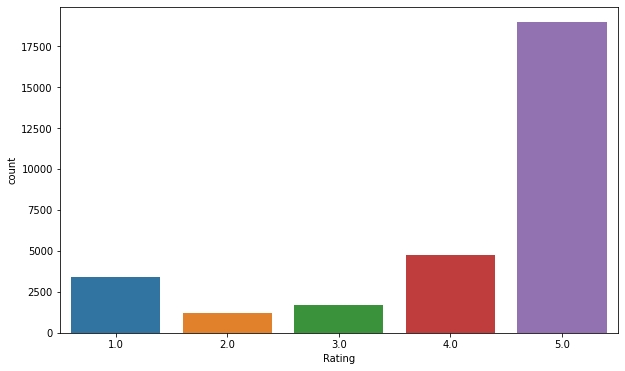

In [ ]:
# Distribution of Ratings :

rcParams['figure.figsize'] = 10,6

sns.countplot(x='Rating',data = product_data)

In [ ]:
# Missing Values :

print('No. of Reviews with missing "Rating" :',product_data['Rating'].isnull().sum())

No. of Reviews with missing "Rating" : 0


**[ Brief on 'Rating' ] :**

* Missing **Rating** records = 0
* Most Reviews contains 5 & 4 star ratings (high ratings) 

**<h3>iii) Review :</h3>**



In [ ]:
# Missing Values :

print('Number of Missing values in "Reviews" :',product_data['Review'].isnull().sum())

Number of Missing values in "Reviews" : 4184


**<h3>iv) Verified Purchaser :</h3>**

In [ ]:
# Missing Values :

product_data['Verified Purchaser'].isnull().sum()

0

In [ ]:
# Distribution of Verified Purchaser :

product_data['Verified Purchaser'].value_counts()

Yes    16138
No     13868
Name: Verified Purchaser, dtype: int64

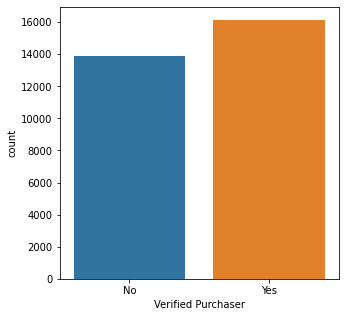

In [ ]:
rcParams['figure.figsize'] = 5,5

sns.countplot(x = 'Verified Purchaser',data = product_data)

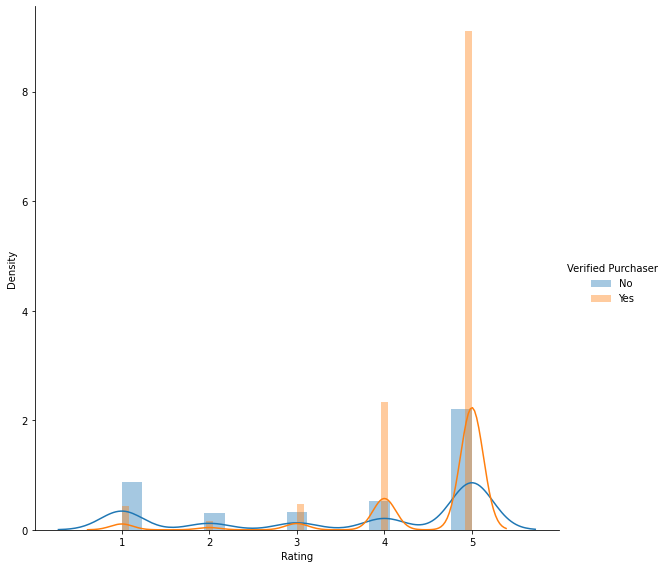

In [ ]:
# Ratings w.r.t 'Verified Purchaser' :

sns.set_style = "Whitegrid";
sns.set_palette = "Set2";
sns.FacetGrid(product_data, hue="Verified Purchaser", height=8) \
   .map(sns.distplot, "Rating") \
   .add_legend();
plt.show();

**Observation :** 

* Most of the reviews are fed by a **Verified Purchaser**
* Most of the Verified Purchaser have given 4.0 or 5.0 rating 

**<h3>v) Recommended Purchase :</h3>**

In [ ]:
# Missing Values :

product_data['Recommended Purchase'].isnull().sum()

0

In [ ]:
# Distribution of 'Recommended Purchase' :

product_data['Recommended Purchase'].value_counts()

No    30006
Name: Recommended Purchase, dtype: int64

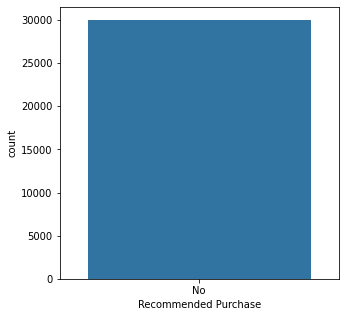

In [ ]:
sns.countplot(x='Recommended Purchase', data = product_data)

**<h3>vi) 'Review Upvotes' and 'Review Downvotes' :</h3>**

**Distribution  Plot:**

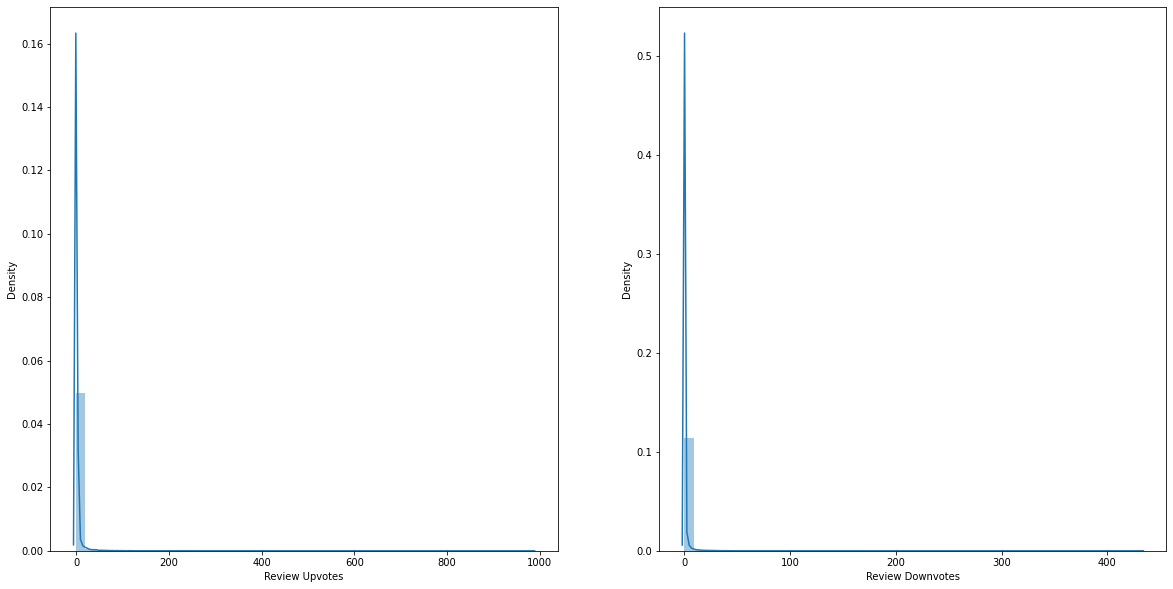

In [ ]:
fig, ax =plt.subplots(1,2)
rcParams['figure.figsize'] = 16,8
sns.distplot(product_data['Review Upvotes'], ax=ax[0])
sns.distplot(product_data['Review Downvotes'], ax=ax[1])
fig.show()

**Box  Plot:**

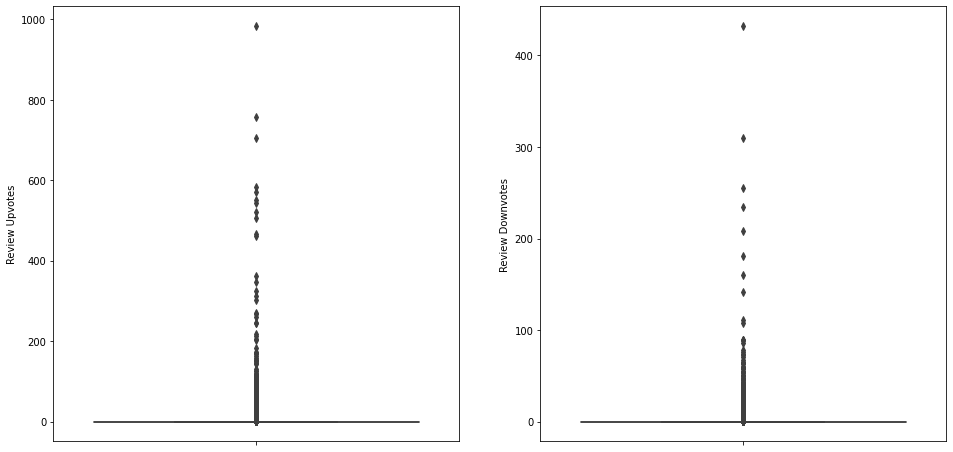

In [ ]:
fig, ax =plt.subplots(1,2)
rcParams['figure.figsize'] = 15,5
sns.boxplot(y = product_data['Review Upvotes'], ax=ax[0])
sns.boxplot(y = product_data['Review Downvotes'], ax=ax[1])
fig.show()

**Percentiles :**

In [ ]:
print('For Review Upvotes : \n') 
print('25th Percentile = ',product_data['Review Upvotes'].quantile(0.25))
print('\n50th Percentile (Median) = ',product_data['Review Upvotes'].quantile(0.50))
print('\n75th Percentile = ',product_data['Review Upvotes'].quantile(0.75))
print('\n99th Percentile = ',product_data['Review Upvotes'].quantile(0.99))

print('\n\nFor Review Downvotes : \n') 
print('25th Percentile = ',product_data['Review Downvotes'].quantile(0.25))
print('\n50th Percentile (Median) = ',product_data['Review Downvotes'].quantile(0.50))
print('\n75th Percentile = ',product_data['Review Downvotes'].quantile(0.75))
print('\n99th Percentile = ',product_data['Review Downvotes'].quantile(0.99))

For Review Upvotes : 

25th Percentile =  0.0

50th Percentile (Median) =  0.0

75th Percentile =  0.0

99th Percentile =  37.0


For Review Downvotes : 

25th Percentile =  0.0

50th Percentile (Median) =  0.0

75th Percentile =  0.0

99th Percentile =  12.0


**Observations :**

* Very few reviews have received Upvotes & Downvotes.
* Very Skewed Distribution

## F) Basic Insights :

* There are some reviews with missing titles & body which provides no value. (Missing values)

* **Recommended Purchase** is not useful as it has just 1 category.

* **Verified Purchaser** is a good categorical feature with almost balanced data distribution.

* Most of the reviewers have given 5 or 4 rating (high rating) which suggests that mostly the purchaser are happy with the Products.

* **Weird Fact :** Though we have received high ratings in overall, still no reviewer has recommended the purchase.....which seems a little odd.

* **Review** is a Text feature, which we can use for Text Semantic Anaysis.

* We can build a **Classification Model** using the Dataset to predict if a given review is **Good** or **Bad**.

    * **'Review'** = Input Data (Features)
    * **'Ratings'** can be used to build O/P Class Labels.